In [9]:
import pandas as pd
import numpy as np

**DataFrame.groupby(by=mapping/ function/ label/ list of labels/Dictionary, axis=0/1, level=None, as_index=default True (For aggregated output, return object with group labels as the index), sort=Default True)**

In [56]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

In [11]:
df

,key1,key2,data1,data2
0,a,one,0.428532,1.536814
1,a,two,-0.982985,0.581555
2,b,one,0.604978,0.575695
3,b,two,0.820324,0.423351
4,a,one,-0.450971,0.443213


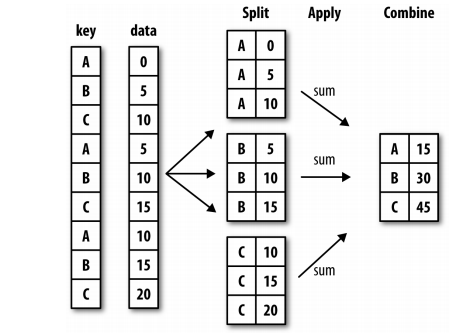

In [12]:
grouped = df['data1'].groupby(df['key1'])

In [13]:
grouped 

In [14]:
grouped.mean()

key1
a   -0.335141
b    0.712651
Name: data1, dtype: float64

In [15]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()

In [16]:
means

key1  key2
a     one    -0.011219
      two    -0.982985
b     one     0.604978
      two     0.820324
Name: data1, dtype: float64

In [17]:
means.unstack()

key2,one,two
key1,,
a,-0.011219,-0.982985
b,0.604978,0.820324


In [18]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])

In [11]:
df['data1'].groupby([states, years]).mean()

California  2005    0.098401
            2006   -0.197542
Ohio        2005   -0.420895
            2006    0.851813
Name: data1, dtype: float64

In [43]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.127918,0.731366
b,-0.236436,0.454872


In [19]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.011219  0.990013
     two  -0.982985  0.581555
b    one   0.604978  0.575695
     two   0.820324  0.423351

In [14]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [15]:
for name, group in df.groupby('key1'):
    print(name) 
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.566460  0.260537
1    a  two  0.098401  1.172106
4    a  one  0.851813  0.761455
b
  key1 key2     data1     data2
2    b  one -0.197542  1.162075
3    b  two -0.275330 -0.252331


In [16]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2) 
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.566460  0.260537
4    a  one  0.851813  0.761455
a two
  key1 key2     data1     data2
1    a  two  0.098401  1.172106
b one
  key1 key2     data1     data2
2    b  one -0.197542  1.162075
b two
  key1 key2    data1     data2
3    b  two -0.27533 -0.252331


In [20]:
pieces = dict(list(df.groupby('key1')))

In [21]:
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.428532  1.536814
 1    a  two -0.982985  0.581555
 4    a  one -0.450971  0.443213,
 'b':   key1 key2     data1     data2
 2    b  one  0.604978  0.575695
 3    b  two  0.820324  0.423351}

In [18]:
pieces['b']

,key1,key2,data1,data2
2,b,one,-0.197542,1.162075
3,b,two,-0.275330,-0.252331


In [22]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [23]:
grouped = df.groupby(df.dtypes, axis=1)

In [24]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.428532  1.536814
 1 -0.982985  0.581555
 2  0.604978  0.575695
 3  0.820324  0.423351
 4 -0.450971  0.443213,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

# Iterating Over Groups


In [22]:
for name, group in df.groupby('key1'):
        print(name)
        print(group)

a
  key1 key2     data1     data2
0    a  one -0.566460  0.260537
1    a  two  0.098401  1.172106
4    a  one  0.851813  0.761455
b
  key1 key2     data1     data2
2    b  one -0.197542  1.162075
3    b  two -0.275330 -0.252331


In [23]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.566460  0.260537
4    a  one  0.851813  0.761455
a two
  key1 key2     data1     data2
1    a  two  0.098401  1.172106
b one
  key1 key2     data1     data2
2    b  one -0.197542  1.162075
b two
  key1 key2    data1     data2
3    b  two -0.27533 -0.252331


In [25]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,key1,key2,data1,data2
2,b,one,0.604978,0.575695
3,b,two,0.820324,0.423351


In [26]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [27]:
 grouped = df.groupby(df.dtypes, axis=1)

In [28]:
 dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.428532  1.536814
 1 -0.982985  0.581555
 2  0.604978  0.575695
 3  0.820324  0.423351
 4 -0.450971  0.443213,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

# Selecting a Column or Subset of Columns

In [57]:
df.head(5)

,key1,key2,data1,data2
0,a,one,-0.000947,-0.165679
1,a,two,2.248055,0.093347
2,b,one,-1.851306,0.566310
3,b,two,0.187904,-1.053066
4,a,one,-0.050490,-0.701010


In [29]:
 df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.990013
     two   0.581555
b    one   0.575695
     two   0.423351

In [30]:
 s_grouped = df.groupby(['key1', 'key2'])['data2']

In [31]:
 s_grouped.mean()

key1  key2
a     one     0.990013
      two     0.581555
b     one     0.575695
      two     0.423351
Name: data2, dtype: float64

# Grouping with Dicts and Series


In [32]:
people = pd.DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

In [33]:
people

,a,b,c,d,e
Joe,-0.375957,-2.213009,2.058529,1.087029,-0.368193
Steve,0.323391,0.175036,-1.799645,1.214596,0.642193
Wes,2.485319,2.396541,0.593058,1.520610,0.762723
Jim,0.384983,-0.423379,-1.414713,-1.362847,0.085835
Travis,0.378830,1.308958,0.102030,-1.396138,-1.389853


In [59]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}

by_column = people.groupby(mapping, axis=1)

by_column.sum()

,blue,red
Joe,3.145558,-2.957160
Steve,-0.585049,1.140620
Wes,2.113668,5.644584
Jim,-2.777560,0.047440
Travis,-1.294108,0.297936


In [35]:
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [36]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,2,3
Jim,2,3
Travis,2,3


# Grouping with Functions

In [62]:
people

,a,b,c,d,e
Joe,-0.375957,-2.213009,2.058529,1.087029,-0.368193
Steve,0.323391,0.175036,-1.799645,1.214596,0.642193
Wes,2.485319,2.396541,0.593058,1.520610,0.762723
Jim,0.384983,-0.423379,-1.414713,-1.362847,0.085835
Travis,0.378830,1.308958,0.102030,-1.396138,-1.389853


In [40]:
people.groupby(len).sum() #length of index names,for example joe=3

,a,b,c,d,e
3,2.494345,-0.239847,1.236874,1.244792,0.480366
5,0.323391,0.175036,-1.799645,1.214596,0.642193
6,0.378830,1.308958,0.102030,-1.396138,-1.389853


In [41]:
 key_list = ['one', 'one', 'one', 'two', 'two'] #changing index names

In [42]:
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -0.375957 -2.213009  0.593058  1.087029 -0.368193
  two  0.384983 -0.423379 -1.414713 -1.362847  0.085835
5 one  0.323391  0.175036 -1.799645  1.214596  0.642193
6 two  0.378830  1.308958  0.102030 -1.396138 -1.389853

# Grouping by Index Levels

In [43]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]], names=['cty', 'tenor'])

In [44]:
hier_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)

In [45]:
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.067813 -0.096145  0.040432 -1.243595 -1.235795
1     -0.567313  1.731304  1.119170  0.117809 -0.398558
2      1.356336 -1.729079 -1.326233 -1.085392 -0.330459
3     -0.638728 -0.769843 -1.165107  0.475032  2.433703

In [46]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3
